In [17]:
'''
Perform standard imbalanced techniques for hyperthyroid data

Classifiers
- Log reg
- SVM
- Naive Bayes
- K-Nearest Neighbors
- Decision Trees

Techniques
- None
- Oversampling
- Undersampling
- SMOTE
- penalized SVM, (LDA)
- XGBoost
'''

'\nPerform standard imbalanced techniques for hepatitis data\n\nClassifiers\n- Log reg\n- SVM\n- Naive Bayes\n- K-Nearest Neighbors\n- Decision Trees\n\nTechniques\n- None\n- Oversampling\n- Undersampling\n- SMOTE\n- penalized SVM, (LDA)\n- XGBoost\n'

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def getScores(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("-----" + name + " scores-----")
    print("Accuracy: " + str(model.score(X_test, y_test)))
    print("Precision: " + str(precision_score(y_test, y_pred)))
    print("Recall: " + str(recall_score(y_test, y_pred)))

    display = PrecisionRecallDisplay.from_estimator(
        model, X_test, y_test, name=name
    )
    _ = display.ax_.set_title(name + " Precision-Recall curve")
    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    print("\n")

def testAllModels(X_train, y_train, X_test, y_test):

    lr = LogisticRegression(random_state=1)
    svm = SVC(random_state=1)
    gnb = GaussianNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()

    lr.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    gnb.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    dt.fit(X_train, y_train)

    getScores("Logistic Regression", lr, X_test, y_test)
    getScores("Support Vector Machine", svm, X_test, y_test)
    getScores("Gaussian Naive Bayes", gnb, X_test, y_test)
    getScores("K Nearest Neighbors", knn, X_test, y_test)
    getScores("Decision Trees", dt, X_test, y_test)

In [26]:
df = pd.read_csv('../data/hyperthyroid.csv')

In [27]:
sc=StandardScaler()
sc.fit(df.drop(["class"], axis = 1))
scaled_features = sc.transform(df.drop(["class"], axis = 1))
X = scaled_features
y = df["class"]

-----Logistic Regression scores-----
Accuracy: 0.9857142857142858
Precision: 0.8888888888888888
Recall: 0.5333333333333333


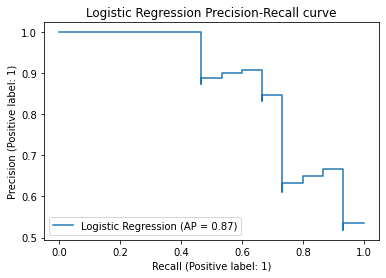

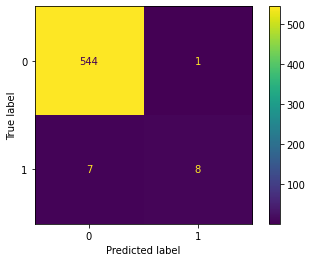



-----Support Vector Machine scores-----
Accuracy: 0.9857142857142858
Precision: 0.8888888888888888
Recall: 0.5333333333333333


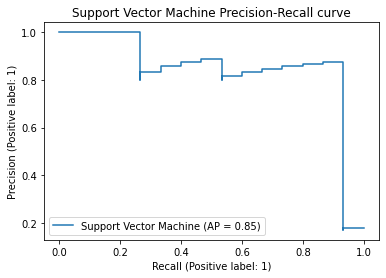

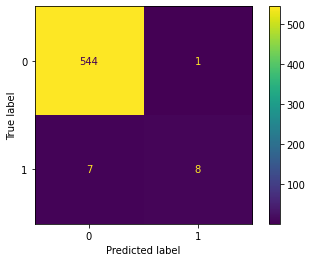



-----Gaussian Naive Bayes scores-----
Accuracy: 0.15892857142857142
Precision: 0.030864197530864196
Recall: 1.0


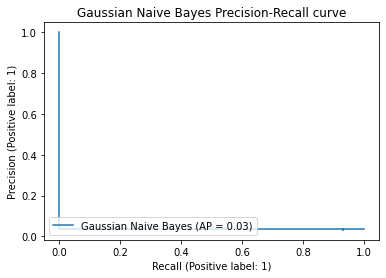

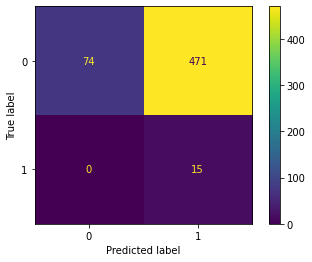



-----K Nearest Neighbors scores-----
Accuracy: 0.9839285714285714
Precision: 0.8
Recall: 0.5333333333333333


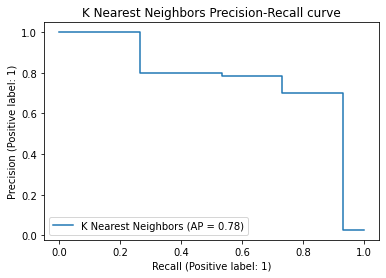

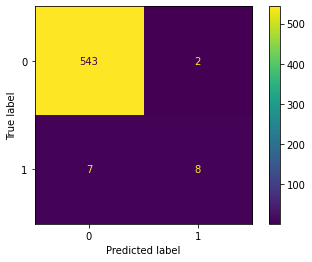



-----Decision Trees scores-----
Accuracy: 0.9910714285714286
Precision: 0.7777777777777778
Recall: 0.9333333333333333


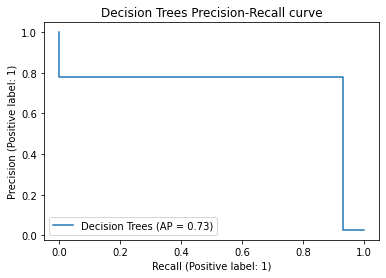

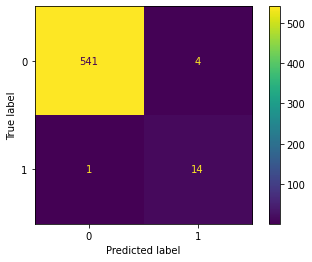

In [28]:
# None
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
testAllModels(X_train, y_train, X_test, y_test)

Ratio: 0.3
-----Logistic Regression scores-----
Accuracy: 0.9696428571428571
Precision: 0.4666666666666667
Recall: 0.9333333333333333


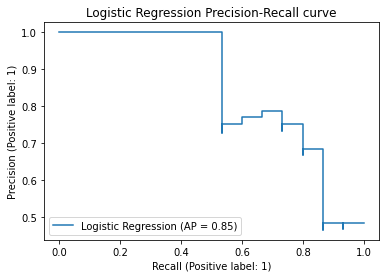

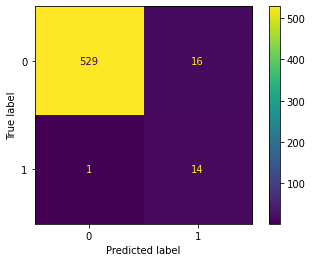



-----Support Vector Machine scores-----
Accuracy: 0.9910714285714286
Precision: 0.7777777777777778
Recall: 0.9333333333333333


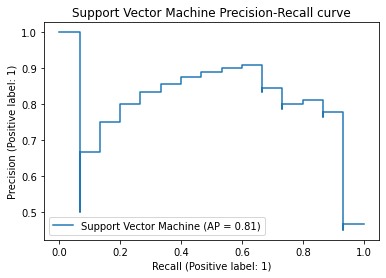

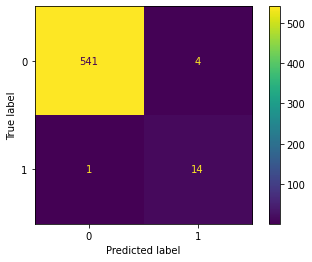



-----Gaussian Naive Bayes scores-----
Accuracy: 0.15892857142857142
Precision: 0.030864197530864196
Recall: 1.0


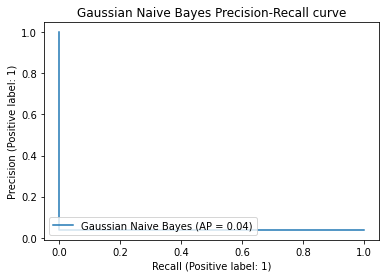

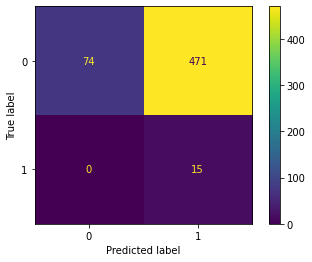



-----K Nearest Neighbors scores-----
Accuracy: 0.9875
Precision: 0.7222222222222222
Recall: 0.8666666666666667


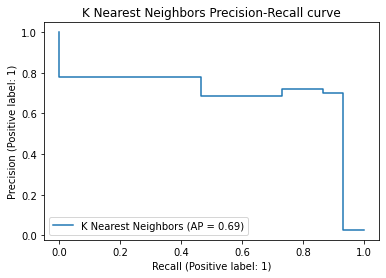

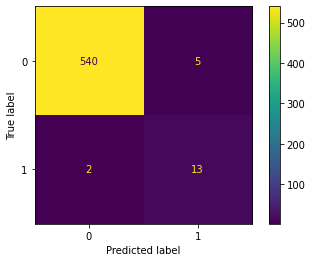



-----Decision Trees scores-----
Accuracy: 0.9839285714285714
Precision: 0.6875
Recall: 0.7333333333333333


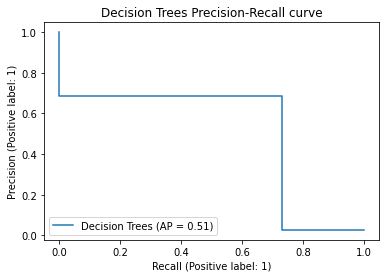

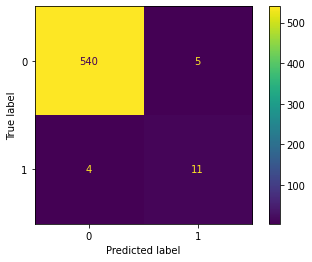





Ratio: 0.6
-----Logistic Regression scores-----
Accuracy: 0.9625
Precision: 0.4166666666666667
Recall: 1.0


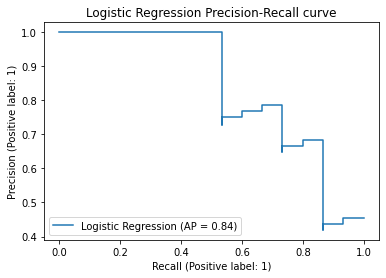

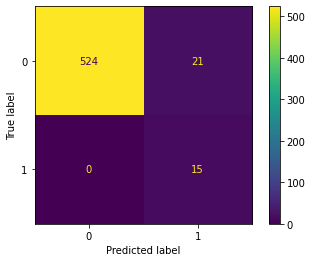



-----Support Vector Machine scores-----
Accuracy: 0.9892857142857143
Precision: 0.7368421052631579
Recall: 0.9333333333333333


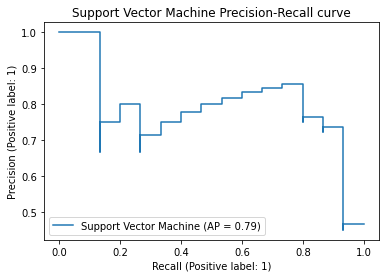

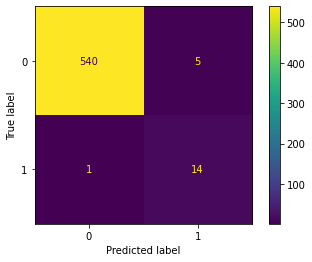



-----Gaussian Naive Bayes scores-----
Accuracy: 0.15892857142857142
Precision: 0.030864197530864196
Recall: 1.0


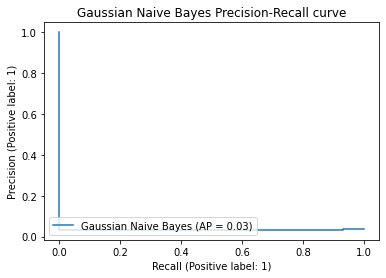

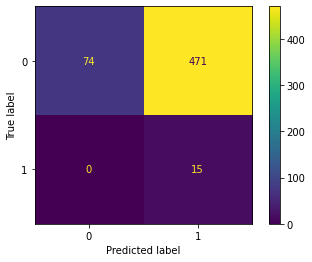



-----K Nearest Neighbors scores-----
Accuracy: 0.9875
Precision: 0.7222222222222222
Recall: 0.8666666666666667


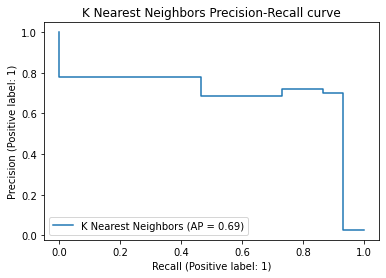

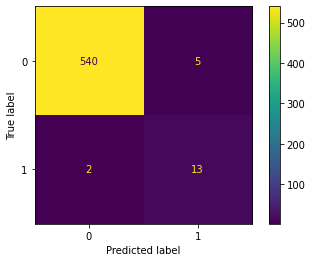



-----Decision Trees scores-----
Accuracy: 0.9821428571428571
Precision: 0.6470588235294118
Recall: 0.7333333333333333


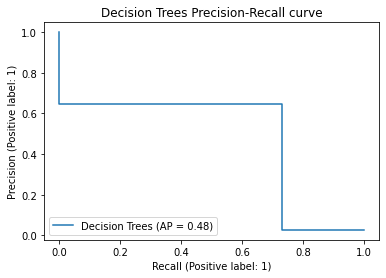

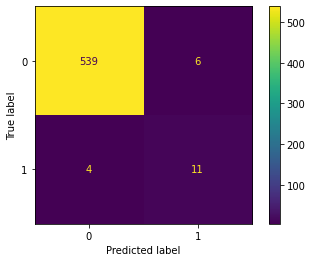





Ratio: 1.0
-----Logistic Regression scores-----
Accuracy: 0.9464285714285714
Precision: 0.3333333333333333
Recall: 1.0


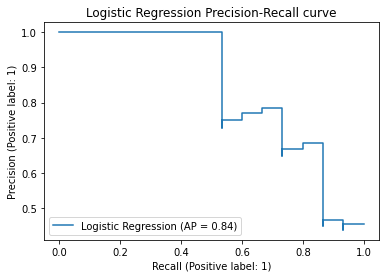

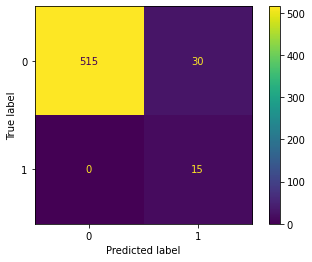



-----Support Vector Machine scores-----
Accuracy: 0.9875
Precision: 0.7
Recall: 0.9333333333333333


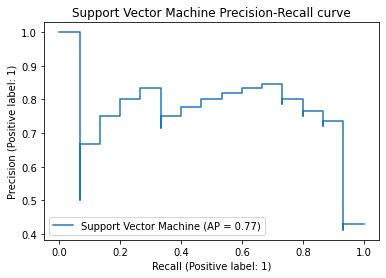

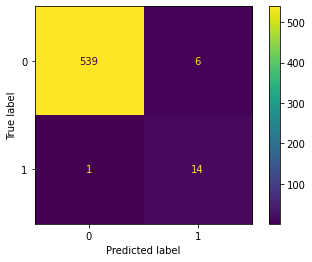



-----Gaussian Naive Bayes scores-----
Accuracy: 0.16071428571428573
Precision: 0.030927835051546393
Recall: 1.0


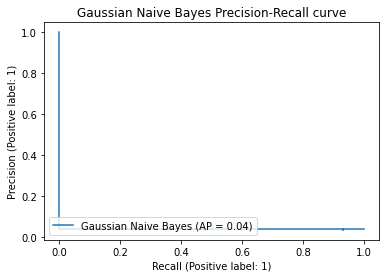

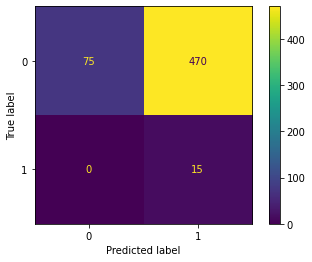



-----K Nearest Neighbors scores-----
Accuracy: 0.9875
Precision: 0.7222222222222222
Recall: 0.8666666666666667


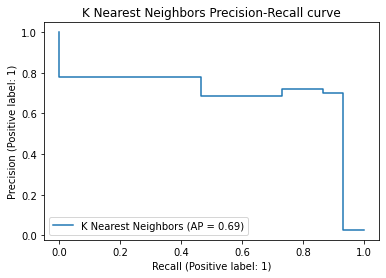

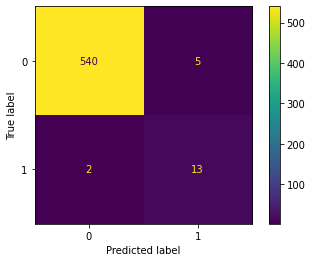



-----Decision Trees scores-----
Accuracy: 0.9875
Precision: 0.7857142857142857
Recall: 0.7333333333333333


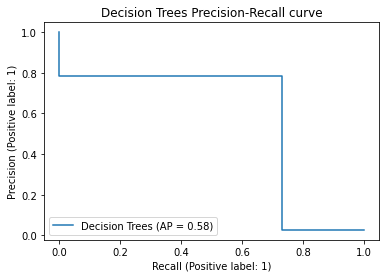

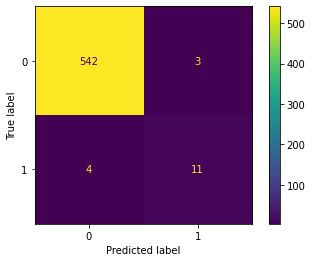

In [29]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler

print('Ratio: 0.3')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
ros = RandomOverSampler(random_state = 1, sampling_strategy = 0.3)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 0.6')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
ros = RandomOverSampler(random_state = 1, sampling_strategy = 0.6)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 1.0')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
ros = RandomOverSampler(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

Ratio: 0.3
-----Logistic Regression scores-----
Accuracy: 0.9625
Precision: 0.4117647058823529
Recall: 0.9333333333333333


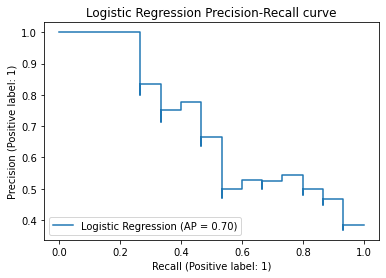

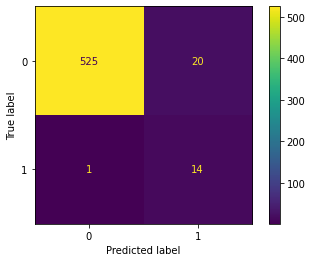



-----Support Vector Machine scores-----
Accuracy: 0.9892857142857143
Precision: 0.7142857142857143
Recall: 1.0


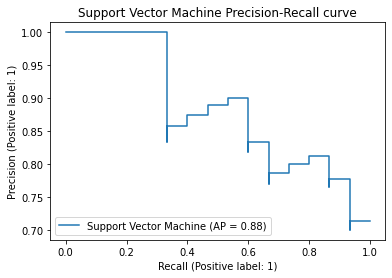

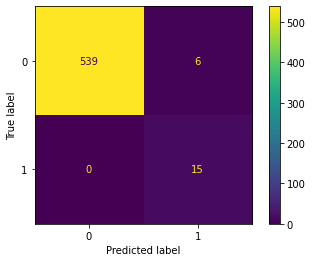



-----Gaussian Naive Bayes scores-----
Accuracy: 0.17857142857142858
Precision: 0.031578947368421054
Recall: 1.0


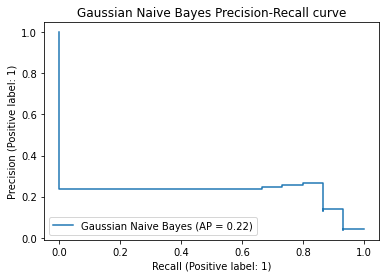

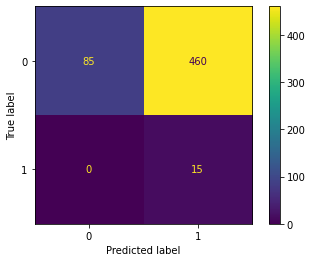



-----K Nearest Neighbors scores-----
Accuracy: 0.9589285714285715
Precision: 0.38235294117647056
Recall: 0.8666666666666667


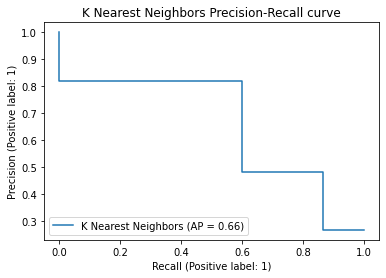

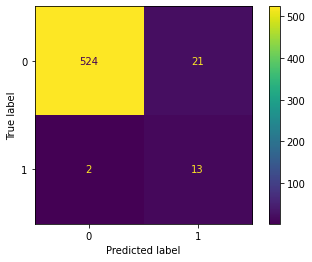



-----Decision Trees scores-----
Accuracy: 0.9678571428571429
Precision: 0.4482758620689655
Recall: 0.8666666666666667


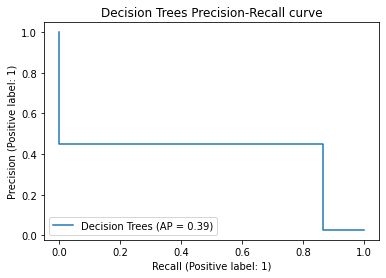

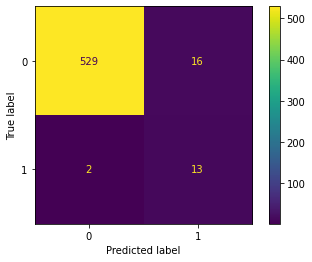





Ratio: 0.6
-----Logistic Regression scores-----
Accuracy: 0.9303571428571429
Precision: 0.2692307692307692
Recall: 0.9333333333333333


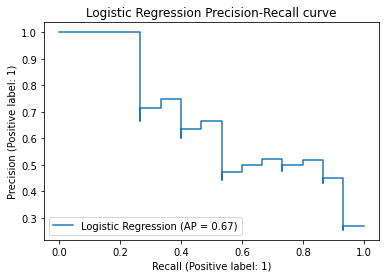

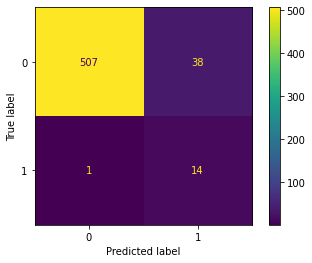



-----Support Vector Machine scores-----
Accuracy: 0.8946428571428572
Precision: 0.20270270270270271
Recall: 1.0


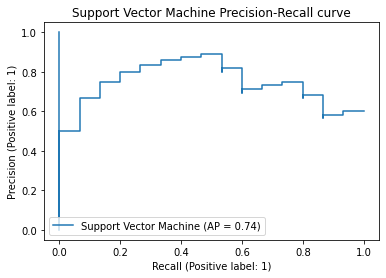

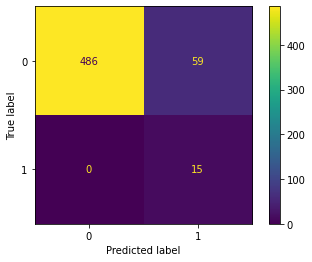



-----Gaussian Naive Bayes scores-----
Accuracy: 0.42857142857142855
Precision: 0.04477611940298507
Recall: 1.0


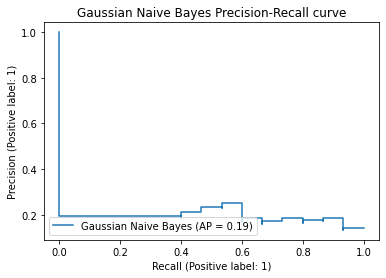

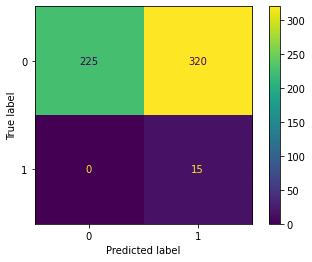



-----K Nearest Neighbors scores-----
Accuracy: 0.9232142857142858
Precision: 0.25862068965517243
Recall: 1.0


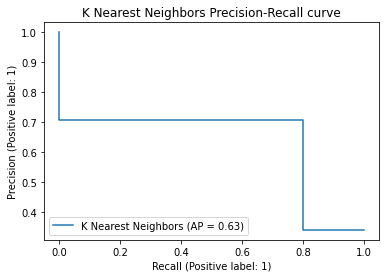

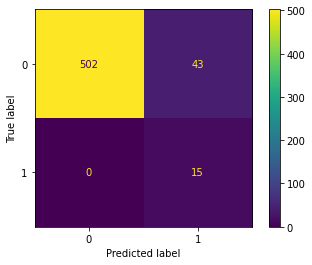



-----Decision Trees scores-----
Accuracy: 0.9178571428571428
Precision: 0.22807017543859648
Recall: 0.8666666666666667


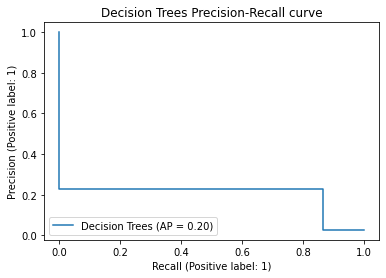

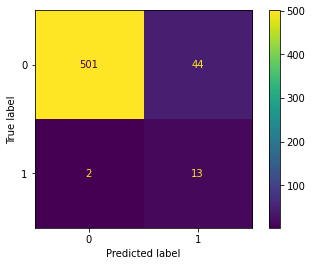





Ratio: 1.0
-----Logistic Regression scores-----
Accuracy: 0.8767857142857143
Precision: 0.17857142857142858
Recall: 1.0


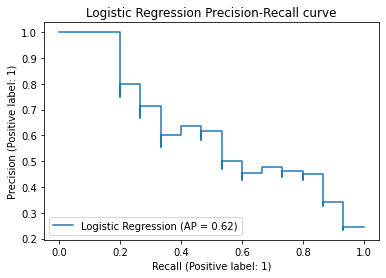

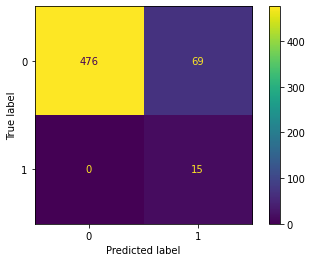



-----Support Vector Machine scores-----
Accuracy: 0.8214285714285714
Precision: 0.13043478260869565
Recall: 1.0


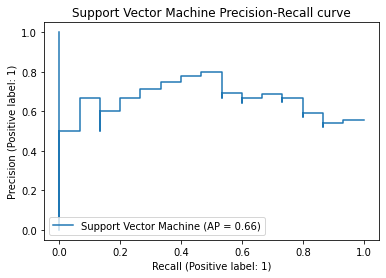

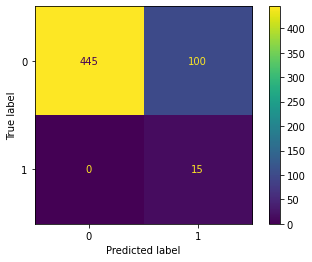



-----Gaussian Naive Bayes scores-----
Accuracy: 0.38571428571428573
Precision: 0.04178272980501393
Recall: 1.0


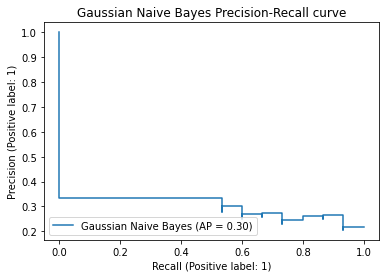

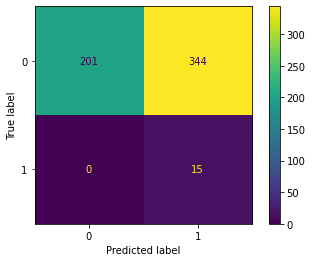



-----K Nearest Neighbors scores-----
Accuracy: 0.8892857142857142
Precision: 0.19480519480519481
Recall: 1.0


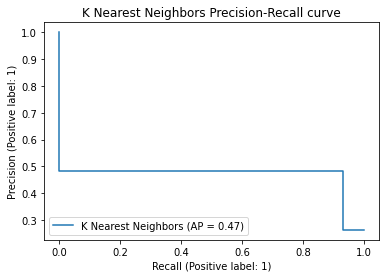

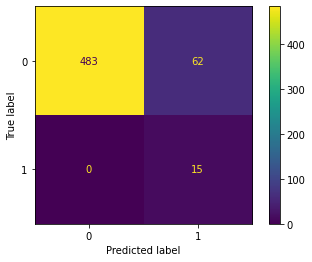



-----Decision Trees scores-----
Accuracy: 0.8642857142857143
Precision: 0.16483516483516483
Recall: 1.0


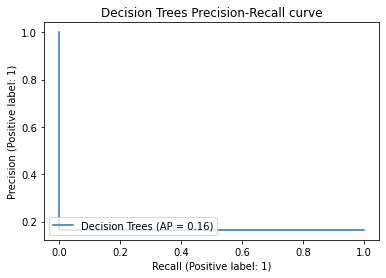

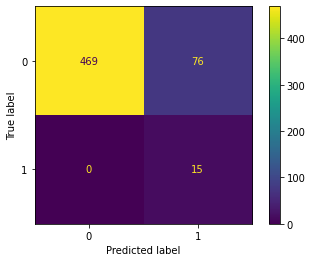

In [31]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

print('Ratio: 0.3')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rus = RandomUnderSampler(random_state = 1, sampling_strategy = 0.3)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 0.6')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rus = RandomUnderSampler(random_state = 1, sampling_strategy = 0.6)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 1.0')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rus = RandomUnderSampler(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

Ratio: 0.3
-----Logistic Regression scores-----
Accuracy: 0.9803571428571428
Precision: 0.5769230769230769
Recall: 1.0


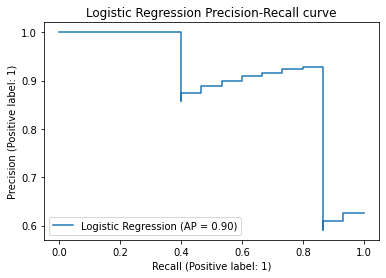

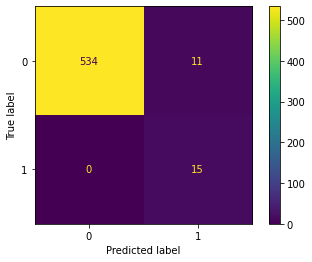



-----Support Vector Machine scores-----
Accuracy: 0.9910714285714286
Precision: 0.7777777777777778
Recall: 0.9333333333333333


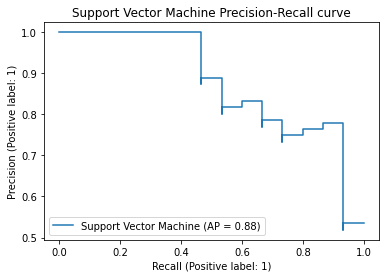

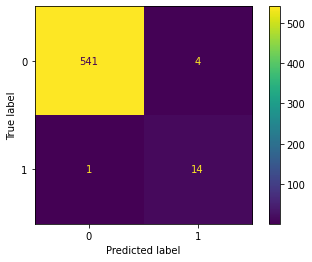



-----Gaussian Naive Bayes scores-----
Accuracy: 0.2767857142857143
Precision: 0.03571428571428571
Recall: 1.0


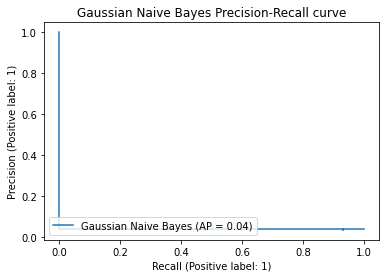

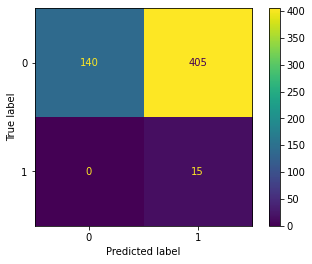



-----K Nearest Neighbors scores-----
Accuracy: 0.9857142857142858
Precision: 0.6842105263157895
Recall: 0.8666666666666667


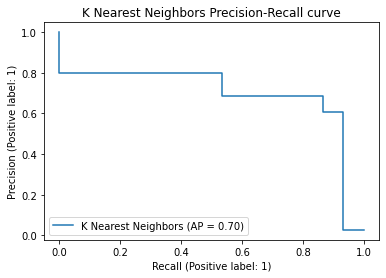

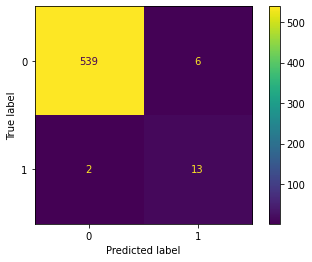



-----Decision Trees scores-----
Accuracy: 0.9821428571428571
Precision: 0.6470588235294118
Recall: 0.7333333333333333


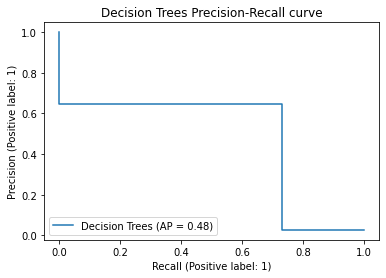

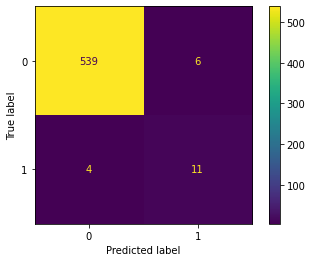





Ratio: 0.6
-----Logistic Regression scores-----
Accuracy: 0.9678571428571429
Precision: 0.45454545454545453
Recall: 1.0


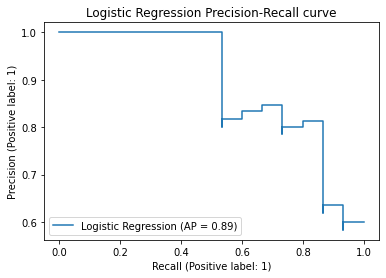

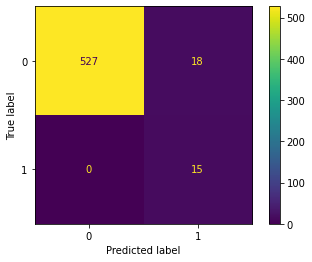



-----Support Vector Machine scores-----
Accuracy: 0.9892857142857143
Precision: 0.7368421052631579
Recall: 0.9333333333333333


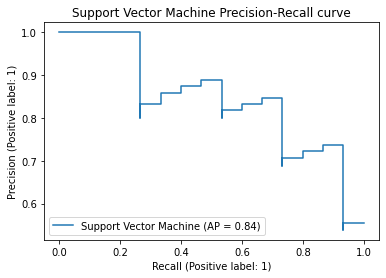

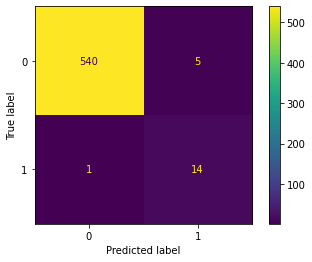



-----Gaussian Naive Bayes scores-----
Accuracy: 0.23035714285714284
Precision: 0.03153153153153153
Recall: 0.9333333333333333


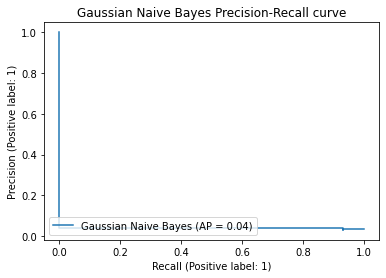

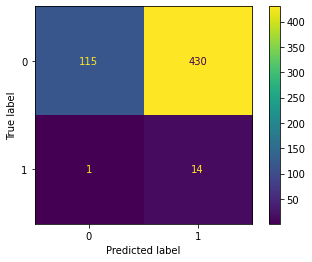



-----K Nearest Neighbors scores-----
Accuracy: 0.9839285714285714
Precision: 0.65
Recall: 0.8666666666666667


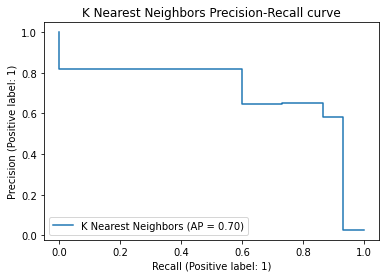

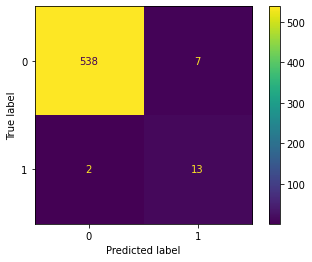



-----Decision Trees scores-----
Accuracy: 0.9857142857142858
Precision: 0.7333333333333333
Recall: 0.7333333333333333


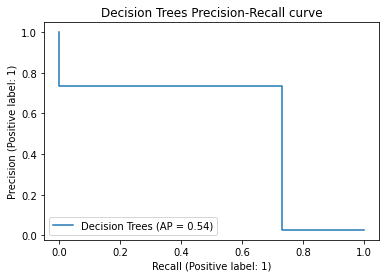

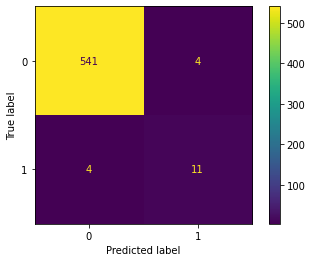





Ratio: 1.0
-----Logistic Regression scores-----
Accuracy: 0.9625
Precision: 0.4166666666666667
Recall: 1.0


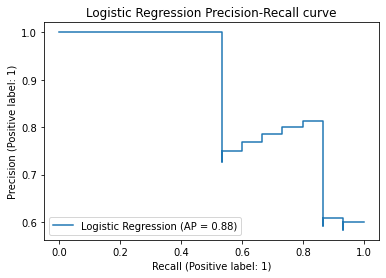

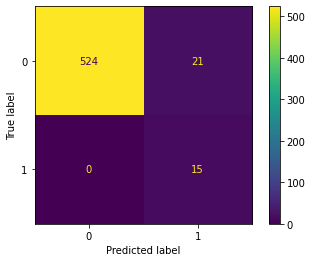



-----Support Vector Machine scores-----
Accuracy: 0.9892857142857143
Precision: 0.7368421052631579
Recall: 0.9333333333333333


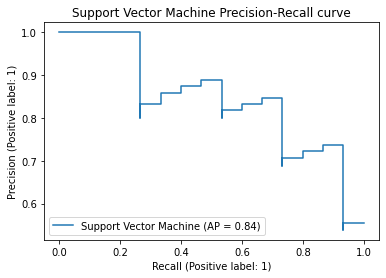

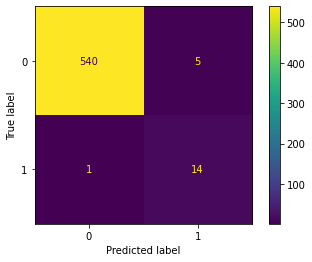



-----Gaussian Naive Bayes scores-----
Accuracy: 0.22857142857142856
Precision: 0.03146067415730337
Recall: 0.9333333333333333


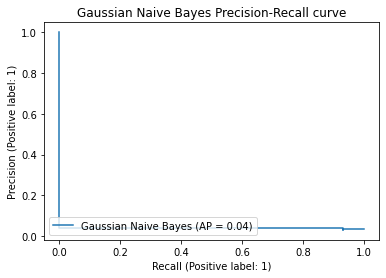

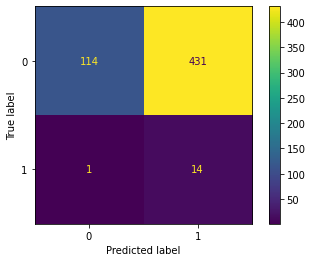



-----K Nearest Neighbors scores-----
Accuracy: 0.9857142857142858
Precision: 0.6842105263157895
Recall: 0.8666666666666667


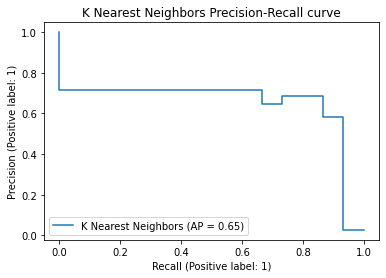

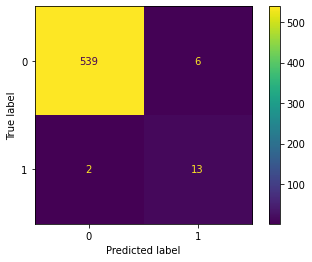



-----Decision Trees scores-----
Accuracy: 0.9875
Precision: 0.7222222222222222
Recall: 0.8666666666666667


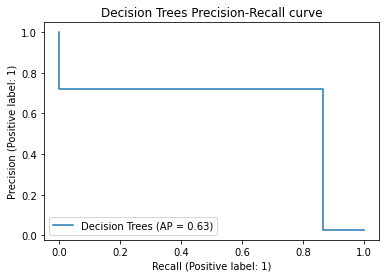

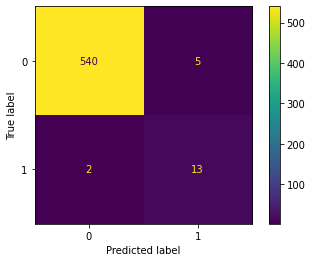

In [32]:
# SMOTE
from imblearn.over_sampling import SMOTE

print('Ratio: 0.3')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
smote = SMOTE(random_state = 1, sampling_strategy = 0.3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 0.6')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
smote = SMOTE(random_state = 1, sampling_strategy = 0.6)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

print('Ratio: 1.0')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print('\n')

-----Support Vector Machine scores-----
Accuracy: 0.9678571428571429
Precision: 0.45454545454545453
Recall: 1.0


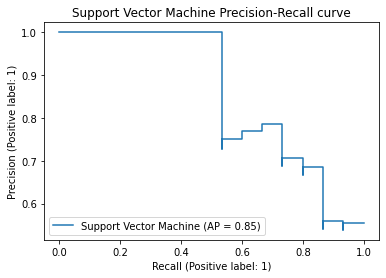

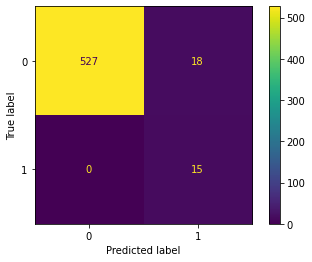

In [30]:
# Penalized SVM

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
svm = SVC(kernel="linear", class_weight={1: 10})
svm.fit(X_train, y_train)
getScores("Support Vector Machine", svm, X_test, y_test)